In [1]:
import brightway2 as bw
from premise import *
bw.projects.set_current("ei_38")

In [2]:
ndb = NewDatabase(
        scenarios = [
            {"model":"image", "pathway":"SSP2-Base", "year":2020},
        ],
        source_db="ecoinvent 3.8 cutoff", 
        source_version="3.8",
        key='tUePmX_S5B8ieZkkM7WUU2CnO8SmShwmAeWK9x2rTFo=',
        use_cached_inventories=True,
        use_cached_database=True
    )

+------------------------------------------------------------------+
| Warning                                                          |
+------------------------------------------------------------------+
| Because some of the scenarios can yield LCI databases            |
| containing net negative emission technologies (NET),             |
| it is advised to account for biogenic CO2 flows when calculating |
| Global Warming potential indicators.                             |
| `premise_gwp` provides characterization factors for such flows.  |
|                                                                  |
| Install it via                                                   |
| pip install premise_gwp                                          |
| or                                                               |
| conda install -c romainsacchi premise_gwp                        |
|                                                                  |
| Within your bw2 project:        

In [3]:
from premise.transformation_tools import get_many
from premise.utils import c

In [8]:
gen = get_many(ndb.database, filters={c.cons_name: "electricity production", c.cons_loc: "DE"})

In [9]:
list(gen)

607

In [6]:
pickle.dump(db.database, open('cached_db.pickle', 'wb'))

In [ ]:
db.database

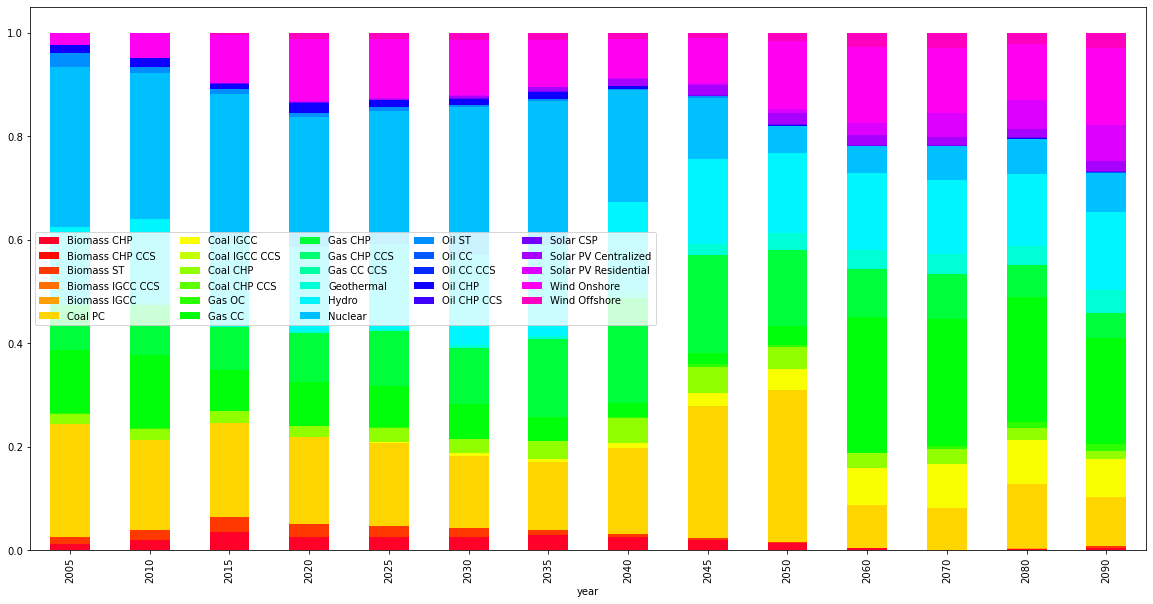

In [15]:
import matplotlib.pyplot as plt

data = ndb.scenarios[0]["external data"].electricity_markets.sel(region="WEU")\
    .to_dataframe("val").unstack()["val"].T

fig = plt.figure()
ax = fig.add_subplot(111)

cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/len(data)) for i in range(len(data))])


data.plot(kind="bar", stacked=True, figsize=(20, 10), ax=ax, cmap=cm)
plt.legend(ncol=5)

In [4]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [5]:
from premise.utils import c

In [15]:
ndb.database.loc[(ndb.database[("ecoinvent", c.efficiency)]>1.01),
                 :].sort_values(by=("ecoinvent", c.efficiency), ascending=False).to_excel("eff_above_1.xlsx")